# Natural Language Processing - Bill Text Exploration


Transform the raw data into feature vectors and these new features will be created using the existing dataset. Structure as follows:

Data Exploration
- Word Cloud 

Vectorizers
- Custom and Spacy Tokenizer
- Count Vectors as features
- TF-IDF Vectors as features

- Word level
- N-Gram level

Character level
- Word Embeddings as features
- Text / NLP based features
- Topic Models as features

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [2]:
import pandas as pd
import numpy as np

In [3]:
raw = pd.read_csv('bills93-114.csv', sep=";", encoding='latin-1')

In [4]:
#https://www.govinfo.gov/help/bills
raw['BillType'].value_counts()

hr         164708
s           72948
hres        19986
sres        11132
hjres        9892
hconres      9265
sjres        3829
sconres      2764
Name: BillType, dtype: int64

In [3]:
df = raw[['BillID','PassH','Title']]

In [4]:
df.tail()

,BillID,PassH,Title
294519,114-SRES-638,0,A resolution recognizing the 75th anniversary ...
294520,114-SRES-639,0,"A resolution designating December 17, 2016, as..."
294521,114-SRES-640,0,A resolution recognizing the death of John Gle...
294522,114-SRES-641,0,A resolution celebrating the 200th anniversary...
294523,114-SRES-642,0,A resolution authorizing taking pictures and f...


In [5]:
df['PassH'].value_counts()

0    265312
1     29212
Name: PassH, dtype: int64

In [26]:
df['Title'].iloc[50000]

'Resolutions disapproving the deferral of certain budget authority.'

# Wordcloud Exploration

Initial exploration of topics in dependent variable using wordcloud and stopword engineering.

Pass House 0 = Bills did not pass House

Pass House 1 = Bill passed House


In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.add("concurrent")
stopwords.add("resolution")
stopwords.add("recognizing")
stopwords.add("providing")
stopwords.add("provide")
stopwords.add("bill")
stopwords.add("congressional")
stopwords.add("authorizing")
stopwords.add("authorize")
stopwords.add("designating")
stopwords.add("designate")
stopwords.add("printi")

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords, 
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


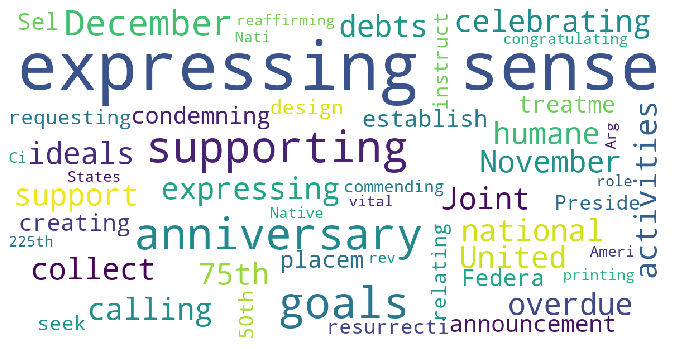

In [8]:
show_wordcloud(df[df['PassH']==0]['Title'])

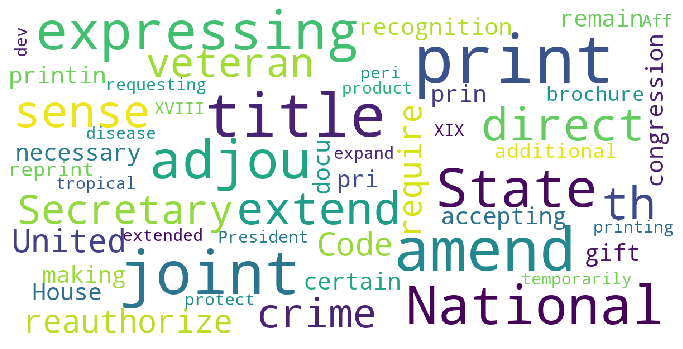

In [9]:
show_wordcloud(df[df['PassH']==1]['Title'])

In [10]:
#Wordcloud on difference of frequencies

# Topic Modeling

**Split Training and Testing Data**

In [11]:
from sklearn import preprocessing

In [12]:
from sklearn.model_selection import train_test_split

X = df['Title']
y = df['PassH']

X_train, y_train, X_test, y_test = train_test_split(X, y,)

Encode our target column so that it can be used in machine learning models (may not be necessary since the data is already binary)

In [13]:
encoder = preprocessing.LabelEncoder()

encoder.fit_transform(y_train)
encoder.fit_transform(y_test)

array([0, 0, 0, ..., 0, 0, 0])

## Feature Engineering


**Create Tokenizer**

Test both the spacy tokenizer and personalized tokenizer against the data.

In [17]:
import spacy
from spacy.lang.en import English
# For part of speech tagging
import en_core_web_sm

nlp = English()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
#Editing the stopwords list
spacy_stopwords.add('concurrent', 'resolution')

In [ ]:
#Lemmitization
lem = nlp()

for word in lem:
    print(word.text, word.lemma_)

In [ ]:
#Part of speech tagging
nlp_pos = en_core_web_sm.load()


In [ ]:
punctuations = string.punctuations

In [ ]:
#Define the spacy tokenizer
spacy_tokenizer = 

In [ ]:
#Define the custom tokenizer
def tokenizer():
    
    
    

**CountVectorizer**

Every row represents a document in the corpus, every column represents a term in the document, every cell represents the frequency count of a particular term in a particular document.

Tuning: analyzer, vectorizer, max_features, max_df, min_df, n_grams

In [ ]:
count_vectorizer = CountVectorizer(analyzer = __, )



In [ ]:
params = {}

In [ ]:
Gridsearch

**Tf-idf**

Represents importance of term in overall corpus structure.

- TF is the number of times the term appears in the document/total terms in document

- IDF is the log_e of total documents/ number of documents with the term in it

Tuning: max_features, max_df, min_df, n_grams, use_idf

In [ ]:
tfidf = 

**Word Embeddings**

**Topic Modeling - LDA**